# Proyecto Integrador IV
> E-Commerce Data Pipeline

En este notebook, primero ejecutaremos todos los componentes de nuestro pipeline ELT y luego realizaremos visualizaciones con la información resultante


In [1]:
# Importing the necessary libraries
from pandas import DataFrame
from sqlalchemy import create_engine
from typing import Dict
from pathlib import Path

from src.transform import QueryEnum
from src import config
from src.transform import run_queries
from src.extract import extract
from src.load import load
from src.config import get_csv_to_table_mapping
from src.plots import (
    plot_freight_value_weight_relationship,
    plot_global_amount_order_status,
    plot_real_vs_predicted_delivered_time,
    plot_revenue_by_month_year,
    plot_revenue_per_state,
    plot_top_10_least_revenue_categories,
    plot_top_10_revenue_categories,
    plot_top_10_revenue_categories_ammount,
    plot_delivery_date_difference,
    plot_order_amount_per_day_with_holidays,
)

In [2]:
# Create the database sql file
Path(config.SQLITE_BD_ABSOLUTE_PATH).touch()

# Create the database connection
ENGINE = create_engine(rf"sqlite:///{config.SQLITE_BD_ABSOLUTE_PATH}", echo=False)

### 1. Extract

Aquí estarás extrayendo la información de las fuentes.

In [3]:
import os

csv_folder = config.DATASET_ROOT_PATH
public_holidays_url = config.PUBLIC_HOLIDAYS_URL

csv_table_mapping = config.get_csv_to_table_mapping()

for csv_file in csv_table_mapping.keys():
    file_path = os.path.join(csv_folder, csv_file)
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"No such file or directory: '{(file_path)}'")

csv_dataframes = extract(csv_folder, csv_table_mapping, public_holidays_url)

### 2. Load

Usando los diferentes conjuntos de datos proporcionados, almacenarás todo en nuestro Data Warehouse.

In [4]:
# Crear carpeta 'data' si no existe
if not os.path.exists("data"):
    os.makedirs("data")
    print("Carpeta 'data' creada exitosamente.")
else:
    print("La carpeta 'data' ya existe.")

La carpeta 'data' ya existe.


In [5]:
from src.load import get_database_connection, load

database_url = "sqlite:///data/olist.db"
database = get_database_connection(database_url) 

load(csv_dataframes, database)

Conexión a la base de datos establecida exitosamente.
Tabla 'olist_customers' cargada exitosamente.
Tabla 'olist_geolocation' cargada exitosamente.
Tabla 'olist_order_items' cargada exitosamente.
Tabla 'olist_order_payments' cargada exitosamente.
Tabla 'olist_order_reviews' cargada exitosamente.
Tabla 'olist_orders' cargada exitosamente.
Tabla 'olist_products' cargada exitosamente.
Tabla 'olist_sellers' cargada exitosamente.
Tabla 'product_category_name_translation' cargada exitosamente.
Tabla 'public_holidays' cargada exitosamente.


In [6]:
from sqlalchemy import create_engine

DB_PATH = "data/olist.db"

# Crear conexión con SQLAlchemy
ENGINE = create_engine(f"sqlite:///{DB_PATH}", echo=True)


In [7]:
import pandas as pd

# Cargar los CSV en DataFrames
df_orders = pd.read_csv("dataset/olist_orders_dataset.csv")
df_customers = pd.read_csv("dataset/olist_customers_dataset.csv")
df_geolocation = pd.read_csv("dataset/olist_geolocation_dataset.csv")
df_order_items = pd.read_csv("dataset/olist_order_items_dataset.csv")
df_order_payments = pd.read_csv("dataset/olist_order_payments_dataset.csv")
df_order_reviews = pd.read_csv("dataset/olist_order_reviews_dataset.csv")
df_products = pd.read_csv("dataset/olist_products_dataset.csv")
df_sellers = pd.read_csv("dataset/olist_sellers_dataset.csv")
df_category_translation = pd.read_csv("dataset/product_category_name_translation.csv")



In [8]:
# Convertir 'order_purchase_timestamp' a datetime en df_orders
df_orders["order_purchase_timestamp"] = pd.to_datetime(df_orders["order_purchase_timestamp"], errors="coerce")

In [9]:
# Cargar los DataFrames en SQLite
df_orders.to_sql("olist_orders_dataset", ENGINE, if_exists="replace", index=False)
df_customers.to_sql("olist_customers_dataset", ENGINE, if_exists="replace", index=False)
df_geolocation.to_sql("olist_geolocation_dataset", ENGINE, if_exists="replace", index=False)
df_order_items.to_sql("olist_order_items_dataset", ENGINE, if_exists="replace", index=False)
df_order_payments.to_sql("olist_order_payments_dataset", ENGINE, if_exists="replace", index=False)
df_order_reviews.to_sql("olist_order_reviews_dataset", ENGINE, if_exists="replace", index=False)
df_products.to_sql("olist_products_dataset", ENGINE, if_exists="replace", index=False)
df_sellers.to_sql("olist_sellers_dataset", ENGINE, if_exists="replace", index=False)
df_category_translation.to_sql("product_category_name_translation", ENGINE, if_exists="replace", index=False)

2025-03-14 15:43:08,511 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("olist_orders_dataset")
2025-03-14 15:43:08,513 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-03-14 15:43:08,517 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("olist_orders_dataset")
2025-03-14 15:43:08,518 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-03-14 15:43:08,520 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-03-14 15:43:08,522 INFO sqlalchemy.engine.Engine 
CREATE TABLE olist_orders_dataset (
	order_id TEXT, 
	customer_id TEXT, 
	order_status TEXT, 
	order_purchase_timestamp DATETIME, 
	order_approved_at TEXT, 
	order_delivered_carrier_date TEXT, 
	order_delivered_customer_date TEXT, 
	order_estimated_delivery_date TEXT
)


2025-03-14 15:43:08,524 INFO sqlalchemy.engine.Engine [no key 0.00184s] ()
2025-03-14 15:43:08,531 INFO sqlalchemy.engine.Engine COMMIT
2025-03-14 15:43:08,631 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-03-14 15:43:09,649 INFO sqlalchemy.engine.Engine INSER

71

In [10]:
import pandas as pd

query = "SELECT COUNT(*) FROM olist_customers_dataset"
df = pd.read_sql(query, ENGINE)
print(df)


2025-03-14 15:43:25,705 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("SELECT COUNT(*) FROM olist_customers_dataset")
2025-03-14 15:43:25,706 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-03-14 15:43:25,710 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("SELECT COUNT(*) FROM olist_customers_dataset")
2025-03-14 15:43:25,712 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-03-14 15:43:25,717 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM olist_customers_dataset
2025-03-14 15:43:25,719 INFO sqlalchemy.engine.Engine [raw sql] ()
   COUNT(*)
0     99441


### 3. Transform

Aquí transformarás las diferentes consultas en tablas. Hay dos secciones: una con las consultas relacionadas con los ingresos y otra con las consultas relacionadas con las entregas.

##### 3.1 Queries sobre ingresos

In [11]:
query_results: Dict[str, DataFrame] = run_queries(database=ENGINE)

2025-03-14 15:43:29,518 INFO sqlalchemy.engine.Engine -- TODO: Esta consulta devolverá una tabla con dos columnas: Estado y 
-- Diferencia_Entrega. La primera contendrá las letras que identifican los 
-- estados, y la segunda mostrará la diferencia promedio entre la fecha estimada 
-- de entrega y la fecha en la que los productos fueron realmente entregados al 
-- cliente.
-- PISTAS:
-- 1. Puedes usar la función julianday para convertir una fecha a un número.
-- 2. Puedes usar la función CAST para convertir un número a un entero.
-- 3. Puedes usar la función STRFTIME para convertir order_delivered_customer_date a una cadena, eliminando horas, minutos y segundos.
-- 4. order_status == 'delivered' AND order_delivered_customer_date IS NOT NULL

SELECT 
    order_status AS Estado,
    AVG(julianday(order_delivered_customer_date) - julianday(order_estimated_delivery_date)) AS Diferencia_Entrega
FROM olist_orders_dataset
WHERE order_status = 'delivered' AND order_delivered_customer_date IS N

In [12]:
# Transforming the revenue_by_month_year query to a table
revenue_by_month_year = query_results[QueryEnum.REVENUE_BY_MONTH_YEAR.value]
revenue_by_month_year

,month_no,month,Year2016,Year2017,Year2018
0,01,None,0.00,127482.37,1077887.46
1,02,None,0.00,271239.32,966168.41
2,03,None,0.00,414330.95,1120598.24
3,04,None,0.00,390812.40,1132878.93
4,05,None,0.00,566851.40,1128774.52
5,06,None,0.00,490050.37,1011978.29
6,07,None,0.00,566299.08,1027807.28
7,08,None,0.00,645832.36,985491.64
8,09,None,143.46,701077.49,0.00
9,10,None,46490.66,751117.01,0.00


In [13]:
# Transforming the top_10_revenue_categories query to a table
top_10_revenue_categories = query_results[QueryEnum.TOP_10_REVENUE_CATEGORIES.value]
top_10_revenue_categories

,Category,Num_order,Revenue
0,health_beauty,8647,1412089.53
1,watches_gifts,5493,1264016.98
2,bed_bath_table,9272,1225209.26
3,sports_leisure,7529,1118062.91
4,computers_accessories,6529,1032603.65
5,furniture_decor,6307,880329.92
6,housewares,5743,758392.25
7,cool_stuff,3559,691680.89
8,auto,3809,669319.92
9,garden_tools,3448,567145.68


In [14]:
# Transforming the top_10_least_revenue_categories query to a table
top_10_least_revenue_categories = query_results[
    QueryEnum.TOP_10_LEAST_REVENUE_CATEGORIES.value
]
top_10_least_revenue_categories

,Category,Num_order,Revenue
0,security_and_services,2,324.51
1,fashion_childrens_clothes,7,598.67
2,cds_dvds_musicals,12,954.99
3,home_comfort_2,24,1170.58
4,flowers,29,1598.91
5,diapers_and_hygiene,25,2046.19
6,arts_and_craftmanship,23,2184.14
7,la_cuisine,13,2388.54
8,fashion_sport,26,2657.55
9,fashio_female_clothing,36,3218.44


In [15]:
# Transforming the revenue_per_state query to a table
revenue_per_state = query_results[QueryEnum.REVENUE_PER_STATE.value]
revenue_per_state

,customer_state,Revenue
0,SP,5768518.23
1,RJ,2055401.57
2,MG,1818891.67
3,RS,861278.79
4,PR,781708.80
5,SC,595127.78
6,BA,591137.81
7,DF,346123.35
8,GO,334212.35
9,ES,317657.93


##### 3.2 Queries sobre entregas

In [16]:
# Transforming the delivery_date_difference query to a table
delivery_date_difference = query_results[QueryEnum.DELIVERY_DATE_DIFFERECE.value]
delivery_date_difference

,Estado,Diferencia_Entrega
0,delivered,-11.178126


In [17]:
# Transforming the real vs predicted delivered time query to a table per month and year
real_vs_estimated_delivered_time = query_results[
    QueryEnum.REAL_VS_ESTIMATED_DELIVERED_TIME.value
]
real_vs_estimated_delivered_time

,month_no,month,Year2016_real_time,Year2017_real_time,Year2018_real_time,Year2016_estimated_time,Year2017_estimated_time,Year2018_estimated_time
0,01,None,NaN,8.602918,15.330987,NaN,38.093287,26.605709
1,02,None,NaN,10.331250,14.672381,NaN,34.958037,26.100344
2,03,None,NaN,11.908795,15.365344,NaN,25.756345,22.557836
3,04,None,NaN,12.813702,15.366259,NaN,26.809681,23.012420
4,05,None,NaN,12.943527,11.861215,NaN,24.909502,22.418769
5,06,None,NaN,11.679506,11.721084,NaN,24.614169,27.801868
6,07,None,NaN,11.289015,9.149208,NaN,23.095980,22.123831
7,08,None,NaN,11.000487,8.741144,NaN,23.493587,16.407960
8,09,None,NaN,12.487484,40.148743,NaN,22.067024,16.967427
9,10,None,14.480048,11.757649,114.608503,55.310101,23.644691,30.519884


In [18]:
# Transforming the global ammount of order status query to a table
global_ammount_order_status = query_results[QueryEnum.GLOBAL_AMMOUNT_ORDER_STATUS.value]
global_ammount_order_status

,estado_pedido,Cantidad
0,approved,2
1,canceled,625
2,created,5
3,delivered,96478
4,invoiced,314
5,processing,301
6,shipped,1107
7,unavailable,609


In [19]:
from src.transform import query_orders_per_day_and_holidays_2017

query_result = query_orders_per_day_and_holidays_2017(database)
print(query_result.result)  # Debería imprimir un DataFrame


          date  order_count  holiday
0   2017-01-05           32    False
1   2017-01-06            4    False
2   2017-01-07            4    False
3   2017-01-08            6    False
4   2017-01-09            5    False
..         ...          ...      ...
356 2017-12-27          167    False
357 2017-12-28          146    False
358 2017-12-29          135    False
359 2017-12-30           97    False
360 2017-12-31           74    False

[361 rows x 3 columns]


In [20]:
orders_per_day_and_holidays = query_results[
    QueryEnum.ORDERS_PER_DAY_AND_HOLIDAYS_2017.value
]
orders_per_day_and_holidays

,date,order_count,holiday
0,2017-01-05,32,False
1,2017-01-06,4,False
2,2017-01-07,4,False
3,2017-01-08,6,False
4,2017-01-09,5,False
...,...,...,...
356,2017-12-27,167,False
357,2017-12-28,146,False
358,2017-12-29,135,False
359,2017-12-30,97,False


In [21]:
df_freight = query_results[QueryEnum.GET_FREIGHT_VALUE_WEIGHT_RELATIONSHIP.value]
print(df_freight.shape)  # Ver la cantidad de filas y columnas
print(df_freight.head())  # Ver algunas filas


(96478, 3)
                           order_id  total_freight_value  total_weight
0  00010242fe8c5a6d1ba2dd792cb16214                13.29         650.0
1  00018f77f2f0320c557190d7a144bdd3                19.93       30000.0
2  000229ec398224ef6ca0657da4fc703e                17.87        3050.0
3  00024acbcdf0a6daa1e931b038114c75                12.79         200.0
4  00042b26cf59d7ce69dfabb4e55b4fd9                18.14        3750.0


In [22]:
freight_value_weight_relationship = query_results[
    QueryEnum.GET_FREIGHT_VALUE_WEIGHT_RELATIONSHIP.value
]

### 4. Graficas de las tablas resultantes

Ahora, crearemos gráficos a partir de las diferentes consultas.

In [23]:
print(revenue_by_month_year)


   month_no month  Year2016    Year2017    Year2018
0        01  None      0.00   127482.37  1077887.46
1        02  None      0.00   271239.32   966168.41
2        03  None      0.00   414330.95  1120598.24
3        04  None      0.00   390812.40  1132878.93
4        05  None      0.00   566851.40  1128774.52
5        06  None      0.00   490050.37  1011978.29
6        07  None      0.00   566299.08  1027807.28
7        08  None      0.00   645832.36   985491.64
8        09  None    143.46   701077.49        0.00
9        10  None  46490.66   751117.01        0.00
10       11  None      0.00  1153364.20        0.00
11       12  None     19.62   843078.29        0.00


In [24]:
# se renombra en month que esta None y se pone el mes correspondiente
import calendar

revenue_by_month_year["month"] = revenue_by_month_year["month_no"].apply(lambda x: calendar.month_abbr[int(x)])


print(revenue_by_month_year)

   month_no month  Year2016    Year2017    Year2018
0        01   Jan      0.00   127482.37  1077887.46
1        02   Feb      0.00   271239.32   966168.41
2        03   Mar      0.00   414330.95  1120598.24
3        04   Apr      0.00   390812.40  1132878.93
4        05   May      0.00   566851.40  1128774.52
5        06   Jun      0.00   490050.37  1011978.29
6        07   Jul      0.00   566299.08  1027807.28
7        08   Aug      0.00   645832.36   985491.64
8        09   Sep    143.46   701077.49        0.00
9        10   Oct  46490.66   751117.01        0.00
10       11   Nov      0.00  1153364.20        0.00
11       12   Dec     19.62   843078.29        0.00


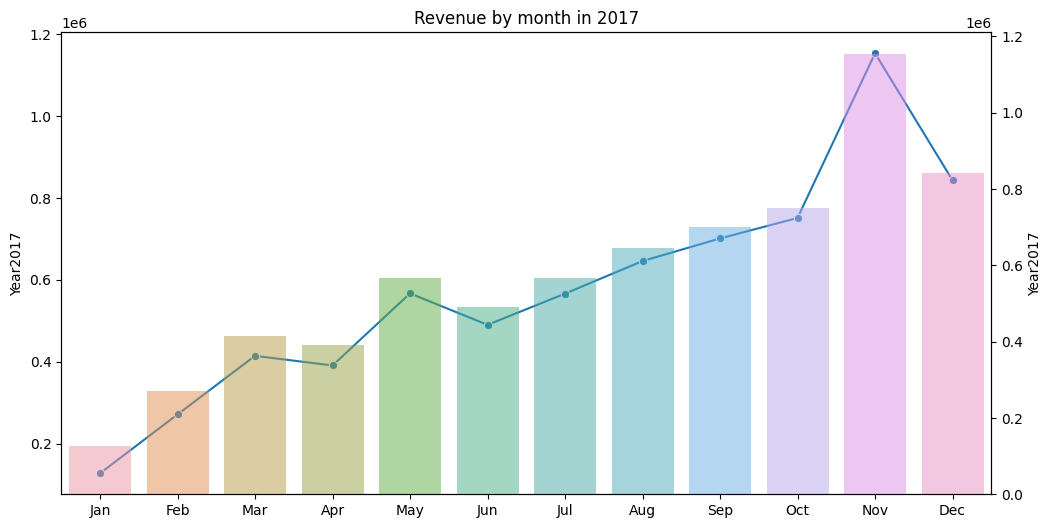

In [25]:
plot_revenue_by_month_year(revenue_by_month_year, 2017)

In [26]:
plot_top_10_revenue_categories(top_10_revenue_categories)

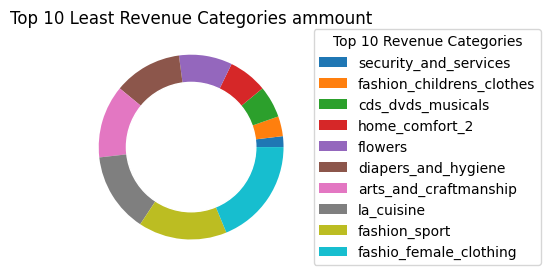

In [27]:
plot_top_10_least_revenue_categories(top_10_least_revenue_categories)

In [28]:
plot_revenue_per_state(revenue_per_state)

In [29]:
# se renombran las columnas ya que la funcion espera State y Delivery_Difference
delivery_date_difference = delivery_date_difference.rename(columns={
    "Estado": "State",
    "Diferencia_Entrega": "Delivery_Difference"
})


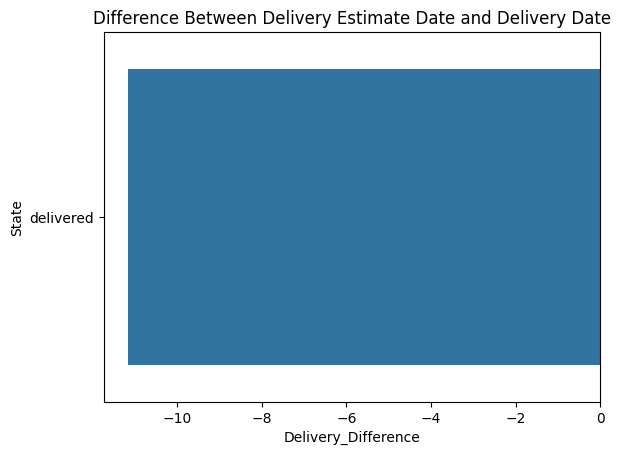

In [30]:
plot_delivery_date_difference(delivery_date_difference)

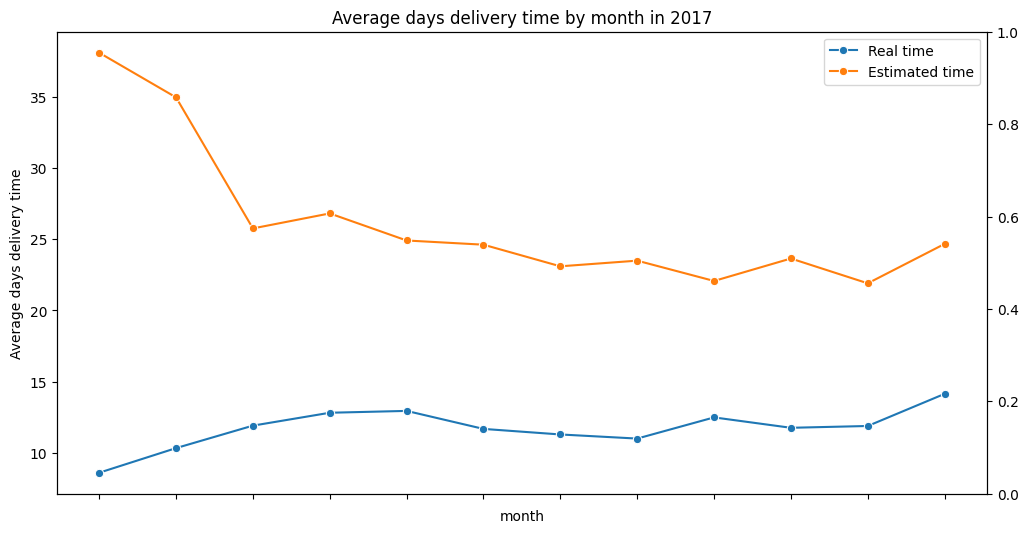

In [31]:
plot_real_vs_predicted_delivered_time(real_vs_estimated_delivered_time, year=2017)

In [32]:
# se renombran las columnas ya que la funcion espera order_status y Ammount
global_ammount_order_status = global_ammount_order_status.rename(columns={
    "estado_pedido": "order_status",
    "Cantidad": "Ammount"
})

In [33]:
print(global_ammount_order_status)

  order_status  Ammount
0     approved        2
1     canceled      625
2      created        5
3    delivered    96478
4     invoiced      314
5   processing      301
6      shipped     1107
7  unavailable      609


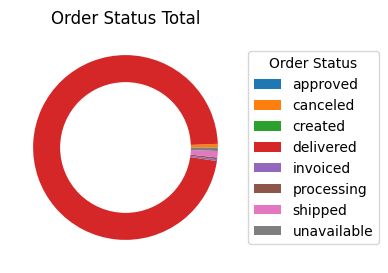

In [34]:
plot_global_amount_order_status(global_ammount_order_status)

In [35]:
print(query_results["orders_per_day_and_holidays_2017"].head())
print(query_results["get_freight_value_weight_relationship"].head())


        date  order_count  holiday
0 2017-01-05           32    False
1 2017-01-06            4    False
2 2017-01-07            4    False
3 2017-01-08            6    False
4 2017-01-09            5    False
                           order_id  total_freight_value  total_weight
0  00010242fe8c5a6d1ba2dd792cb16214                13.29         650.0
1  00018f77f2f0320c557190d7a144bdd3                19.93       30000.0
2  000229ec398224ef6ca0657da4fc703e                17.87        3050.0
3  00024acbcdf0a6daa1e931b038114c75                12.79         200.0
4  00042b26cf59d7ce69dfabb4e55b4fd9                18.14        3750.0


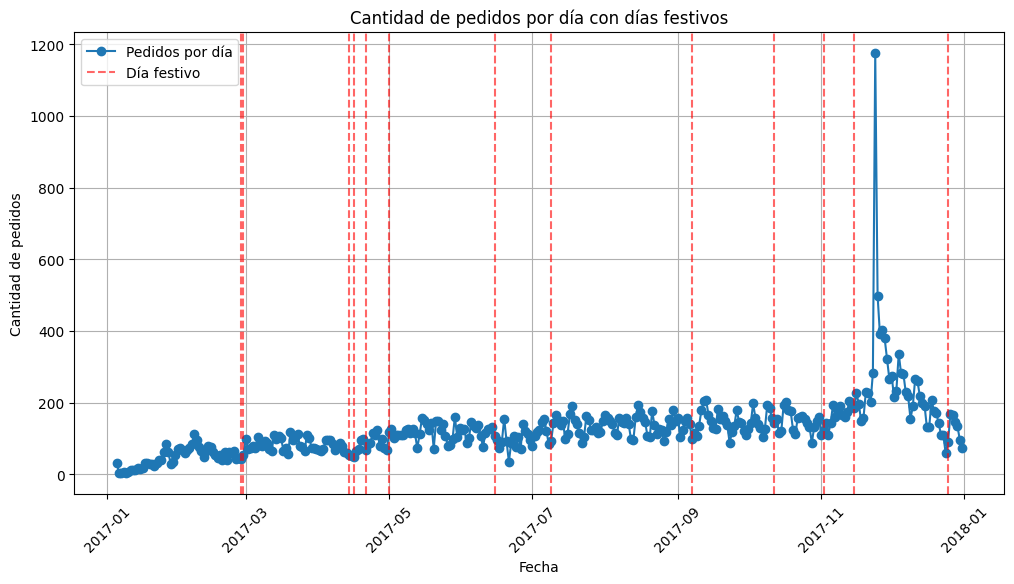

In [36]:
plot_order_amount_per_day_with_holidays(orders_per_day_and_holidays)

El gráfico de Pedidos por Día y Días Festivos que programarás en **src/plots.py** debe ser similar a este:

![The plot you will code will be similar to this:](images/orders_per_day_and_holidays.png "Orders per Day and Holidays")

4.1 ¿Ves alguna relación entre los días festivos en Brasil durante 2017 y las compras de ese año?

Respuesta: Sí, se observa que los días festivos no tienen un impacto directo en los pedidos diarios, aunque hay un pico de pedidos en noviembre, que probablemente esta relacionado con el Black Friday,  Los días festivos no muestran una reducción de pedidos, lo que sugiere es que los consumidores en Brasil pueden seguir comprando online sin importar estos días.

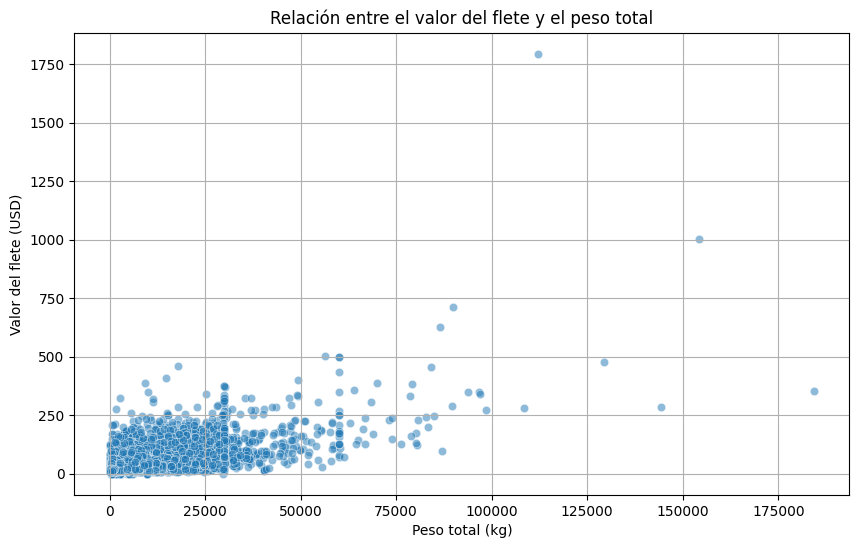

In [37]:
plot_freight_value_weight_relationship(freight_value_weight_relationship)

El gráfico sobre la relación entre el valor del flete y el peso del producto que debes programar en `src/plots.py` tiene que ser similar a este:

![The plot you will code will be similar to this:](images/freight_value_weight_relationship.png "Freight Value and Weight Relationship")

4.2 ¿Ves alguna correlación entre el valor del flete y el peso del producto?

Respuesta: no hay una correlación clara entre el valor del flete y el peso del producto, la mayoría de los envíos son livianos y tienen costos de flete relativamente bajos.